In [6]:
%load_ext autoreload
%autoreload 2

# HTM Modules
from util import *
from ArcExpression import *
from performance_metrics import *
from Statistics import *

from scipy import stats
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
proj_meta = load_meta()

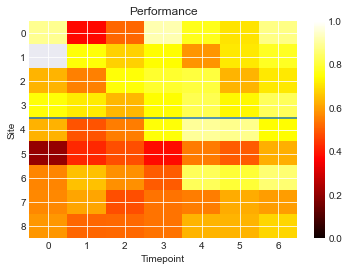

In [19]:
perf = eval_performance_DM(proj_meta)
imagesc(perf, cmap="hot", clim=(0,1)); plt.colorbar()
plt.title("Performance")
plt.xlabel("Timepoint")
plt.ylabel("Site")
plt.axhline(3.5);

(9, 7)

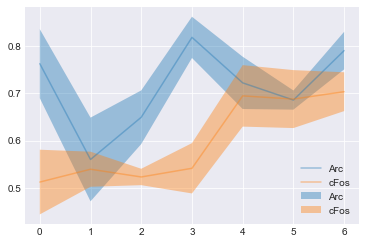

In [60]:
plot_SEM(perf[:3,:], alpha=0.4, label="Arc")
plot_SEM(perf[4:,:], alpha=0.4, label="cFos")
plt.legend();
perf.shape

## IEG levels vs performance

In [66]:
tps = np.arange(0, 13, 2)
IEG_lev = np.zeros((len(proj_meta), len(tps)))
for site in range(len(proj_meta)):
    cnt = 0
    for tp in tps:
        IEG_lev[site, cnt] = np.mean(normalize_IEG(proj_meta, site, tp).flatten())
        cnt += 1

Text(0,0.5,'Performance')

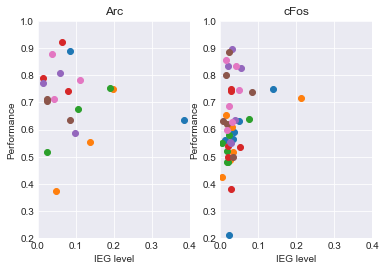

In [126]:
plt.subplot(1,2,1)
plt.plot(IEG_lev[:3,:],perf[:3,:],'o');
plt.xlim((0, 0.4))
plt.ylim((0.2, 1))
plt.title("Arc")
plt.xlabel("IEG level")
plt.ylabel("Performance")

plt.subplot(1,2,2)
plt.plot(IEG_lev[3:,:],perf[3:,:],'o');
plt.xlim((0, 0.4))
plt.ylim((0.2, 1))
plt.title("cFos")
plt.xlabel("IEG level")
plt.ylabel("Performance")